In [1]:
import time
import os
import cv2

from lib.file.TIF import *
from lib.analysis.ROI_identification import *
from lib.file.ROI_writer import ROIFileWriter
from lib.file.ROI_reader import ROIFileReader
from lib.file.TSV import RegionExporter
from lib.analysis.align import ImageAlign
from lib.file.DAT import TracesDAT
from lib.trace import Tracer
from lib.utilities import *
from lib.analysis.laminar_dist import *

####### GRID ROIS #######
# for each recording:
## 1) divide the entire frame of recording into grid of square n_sq x n_sq ROIs
## 2) write these grid square ROIs to file
## 3) take SNRs and latencies to .dat file of each ROI from PhotoZ
## filter out no-response grid squares by SNR cutoff (or manual inspection?)
## write out output file of (ROI center x, ROI center y, SNR, latency)
## analysis: directed graph analysis of latency, 3-D plot of latency, 3-D plot of SNR

In [2]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/"

n_sq = 10  # number of pixels of each square edge in the grid.
snr_cutoff_sq = 5.0  # SNR cutoff 

# sets of files in each slice directory -- naming convention
# input
corners_file_prefix_layer = 'corners_layer'  # defines axes of L4 boundaries
electrode_file_prefix = 'electrode'
# also needed: 01_01_01_snr.dat

# output files
rois_file_prefix = 'sq_rois' # e.g. 'sq_rois_01_to_09.dat'
rois_centers_filenames = "roi_centers.txt"

image_data = {}
n_plots = 5000  # show up to how many plots

disable_photoZ_interact = False
initialize_photoZ = False

In [3]:
# set up PhotoZ (open it manually)
aPhz = AutoPhotoZ(data_dir=data_dir)
if initialize_photoZ and not disable_photoZ_interact:
    aPhz.prepare_photoZ()

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda
C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01
slice 2 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01/corners_layer.dat
edge_pts [[8, 69], [37, 71]] axis_pts [[44, 10], [77, 17]]
laminar axis unit vectors: [-0.5208646456291304, 0.8536392803366304] [-0.5952275506257376, 0.8035571933447457]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01/corners_layer_laminar_distances.txt


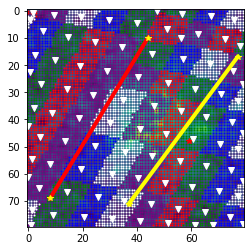

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03
slice 2 , rec 3
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03/corners_layer.dat
edge_pts [[8, 69], [37, 71]] axis_pts [[44, 10], [77, 17]]
laminar axis unit vectors: [-0.5208646456291304, 0.8536392803366304] [-0.5952275506257376, 0.8035571933447457]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03/corners_layer_laminar_distances.txt


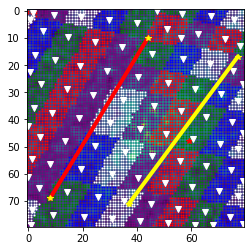

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02
slice 2 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02/corners_layer.dat
edge_pts [[39, 70], [8, 68]] axis_pts [[72, 15], [44, 10]]
laminar axis unit vectors: [-0.5144957554275266, 0.8574929257125442] [-0.5273628617781428, 0.8496401661981191]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02/corners_layer_laminar_distances.txt


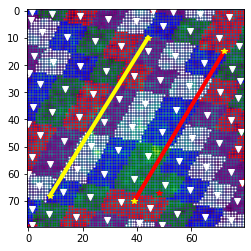

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01
slice 3 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01/corners_layer.dat
edge_pts [[18, 69], [48, 72]] axis_pts [[26, 9], [56, 11]]
laminar axis unit vectors: [-0.13216372009101796, 0.9912279006826347] [-0.13003403680018621, 0.9915095306014198]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01/corners_layer_laminar_distances.txt


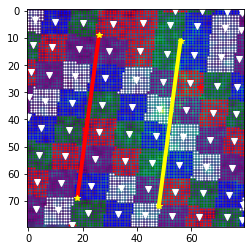

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01
slice 3 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01/corners_layer.dat
edge_pts [[18, 70], [53, 72]] axis_pts [[23, 8], [52, 11]]
laminar axis unit vectors: [-0.08038418992031009, 0.996763955011845] [0.01639124023930107, 0.9998656545973652]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01/corners_layer_laminar_distances.txt


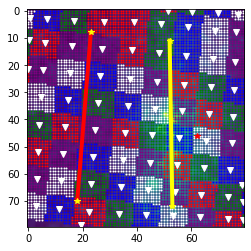

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_02
slice 3 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_02/corners_layer.dat
edge_pts [[18, 70], [53, 72]] axis_pts [[23, 8], [52, 11]]
laminar axis unit vectors: [-0.08038418992031009, 0.996763955011845] [0.01639124023930107, 0.9998656545973652]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_02/corners_layer_laminar_distances.txt


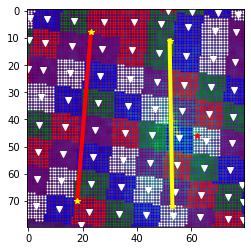

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_12
slice 3 , rec 12
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_12/corners_layer.dat
edge_pts [[18, 70], [53, 72]] axis_pts [[23, 8], [52, 11]]
laminar axis unit vectors: [-0.08038418992031009, 0.996763955011845] [0.01639124023930107, 0.9998656545973652]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_12//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_12/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_12/corners_layer_laminar_distances.txt


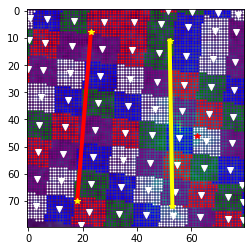

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_01
slice 6 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_01/corners_layer.dat
edge_pts [[4, 65], [41, 72]] axis_pts [[59, 12], [75, 35]]
laminar axis unit vectors: [-0.7200778916462509, 0.6938932410409328] [-0.6766252893427926, 0.736327520755392]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_01/corners_layer_laminar_distances.txt


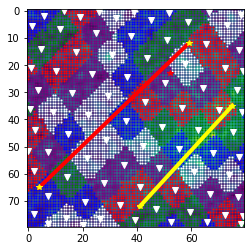

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_03
slice 6 , rec 3
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_03/corners_layer.dat
edge_pts [[4, 65], [41, 72]] axis_pts [[59, 12], [75, 35]]
laminar axis unit vectors: [-0.7200778916462509, 0.6938932410409328] [-0.6766252893427926, 0.736327520755392]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_03//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_03/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_03/corners_layer_laminar_distances.txt


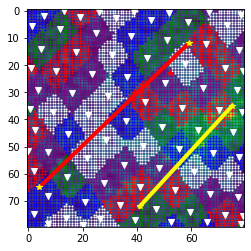

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_06
slice 6 , rec 6
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_06/corners_layer.dat
edge_pts [[4, 65], [41, 72]] axis_pts [[59, 12], [75, 35]]
laminar axis unit vectors: [-0.7200778916462509, 0.6938932410409328] [-0.6766252893427926, 0.736327520755392]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_06//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_06/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis06_01_06/corners_layer_laminar_distances.txt


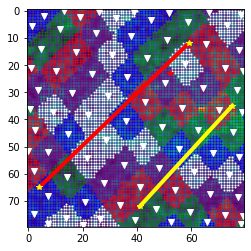

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda
C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_01_07
slice 1 , rec 7
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_01_07/corners_layer.dat
edge_pts [[5, 45], [32, 70]] axis_pts [[62, 13], [74, 37]]
laminar axis unit vectors: [-0.8719837853854813, 0.4895347567076386] [-0.7863183388224226, 0.6178215519319035]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_01_07//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_01_07/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_01_07/corners_layer_laminar_distances.txt


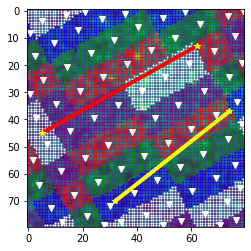

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_02_05
slice 1 , rec 5
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_02_05/corners_layer.dat
edge_pts [[6, 41], [30, 71]] axis_pts [[60, 11], [74, 36]]
laminar axis unit vectors: [-0.8741572761215377, 0.48564293117863205] [-0.7826010541756486, 0.6225235658215387]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_02_05//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_02_05/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_02_05/corners_layer_laminar_distances.txt


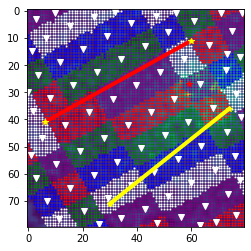

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_03
slice 1 , rec 3
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_03/corners_layer.dat
edge_pts [[6, 35], [26, 70]] axis_pts [[57, 10], [76, 36]]
laminar axis unit vectors: [-0.8979207227269799, 0.44015721702302935] [-0.8269265020695281, 0.5623100214072791]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_03//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_03/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_03/corners_layer_laminar_distances.txt


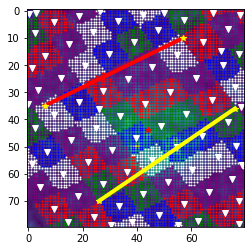

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_04
slice 1 , rec 4
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_04/corners_layer.dat
edge_pts [[6, 35], [26, 70]] axis_pts [[57, 10], [76, 36]]
laminar axis unit vectors: [-0.8979207227269799, 0.44015721702302935] [-0.8269265020695281, 0.5623100214072791]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_04//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_04/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_03_04/corners_layer_laminar_distances.txt


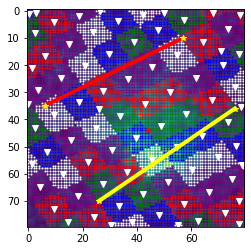

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_04_02
slice 1 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_04_02/corners_layer.dat
edge_pts [[7, 38], [32, 70]] axis_pts [[49, 11], [73, 35]]
laminar axis unit vectors: [-0.8411784753765535, 0.5407575913134988] [-0.7605645022019074, 0.6492623799284576]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_04_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_04_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_04_02/corners_layer_laminar_distances.txt


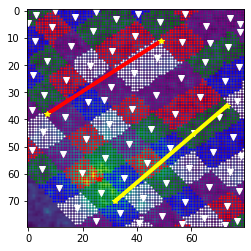

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_05_05
slice 1 , rec 5
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_05_05/corners_layer.dat
edge_pts [[6, 39], [34, 67]] axis_pts [[48, 11], [75, 38]]
laminar axis unit vectors: [-0.8320502943378437, 0.5547001962252291] [-0.8164156395068652, 0.5774647206268071]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_05_05//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_05_05/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis01_05_05/corners_layer_laminar_distances.txt


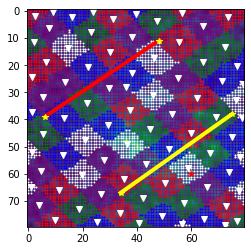

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_02
slice 2 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_02/corners_layer.dat
edge_pts [[78, 26], [75, 60]] axis_pts [[13, 8], [9, 47]]
laminar axis unit vectors: [0.9637300218770024, 0.26687908298132373] [0.9811482730462595, 0.19325647802426324]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_02/corners_layer_laminar_distances.txt


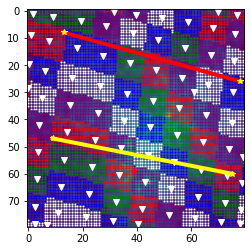

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_04
slice 2 , rec 4
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_04/corners_layer.dat
edge_pts [[78, 26], [75, 60]] axis_pts [[13, 8], [9, 47]]
laminar axis unit vectors: [0.9637300218770024, 0.26687908298132373] [0.9811482730462595, 0.19325647802426324]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_04//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_04/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_01_04/corners_layer_laminar_distances.txt


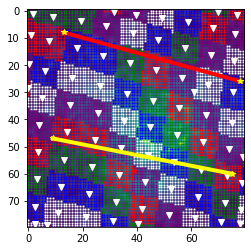

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_02_02
slice 2 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_02_02/corners_layer.dat
edge_pts [[12, 14], [5, 48]] axis_pts [[73, 26], [70, 60]]
laminar axis unit vectors: [-0.981194456491118, -0.19302186029333468] [-0.9833821803872266, -0.18154747945610336]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_02_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_02_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_02_02/corners_layer_laminar_distances.txt


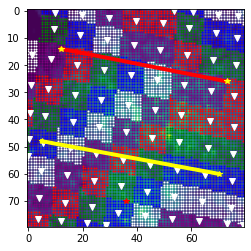

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_05
slice 2 , rec 5
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_05/corners_layer.dat
edge_pts [[8, 17], [7, 52]] axis_pts [[74, 30], [70, 59]]
laminar axis unit vectors: [-0.9811482730462595, -0.19325647802426324] [-0.9938837346736189, -0.11043152607484655]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_05//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_05/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_05/corners_layer_laminar_distances.txt


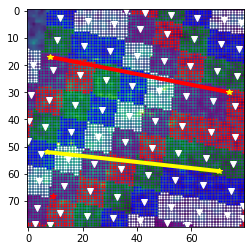

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_08
slice 2 , rec 8
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_08/corners_layer.dat
edge_pts [[8, 17], [7, 52]] axis_pts [[74, 30], [70, 59]]
laminar axis unit vectors: [-0.9811482730462595, -0.19325647802426324] [-0.9938837346736189, -0.11043152607484655]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_08//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_08/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-07-23\selected_zda\analysis02_03_08/corners_layer_laminar_distances.txt


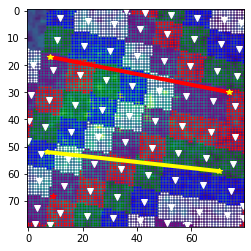

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda
C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_01
slice 2 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_01/corners_layer.dat
edge_pts [[75, 57], [52, 72]] axis_pts [[16, 9], [8, 34]]
laminar axis unit vectors: [0.7757116786991037, 0.63108746741622] [0.7568230077691596, 0.6536198703460924]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_01/corners_layer_laminar_distances.txt


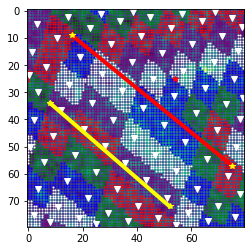

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_04
slice 2 , rec 4
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_04/corners_layer.dat
edge_pts [[75, 57], [52, 72]] axis_pts [[16, 9], [8, 34]]
laminar axis unit vectors: [0.7757116786991037, 0.63108746741622] [0.7568230077691596, 0.6536198703460924]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_04//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_04/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_04/corners_layer_laminar_distances.txt


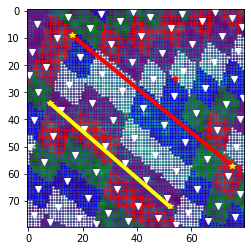

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_06
slice 2 , rec 6
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_06/corners_layer.dat
edge_pts [[75, 57], [52, 72]] axis_pts [[16, 9], [8, 34]]
laminar axis unit vectors: [0.7757116786991037, 0.63108746741622] [0.7568230077691596, 0.6536198703460924]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_06//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_06/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_01_06/corners_layer_laminar_distances.txt


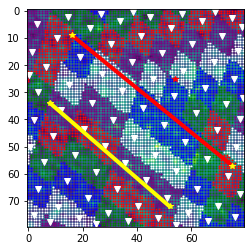

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_02_03
slice 2 , rec 3
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_02_03/corners_layer.dat
edge_pts [[75, 60], [48, 72]] axis_pts [[18, 8], [8, 31]]
laminar axis unit vectors: [0.738766024783967, 0.6739619875222155] [0.6983238520753277, 0.7157819483772108]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_02_03//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_02_03/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_02_03/corners_layer_laminar_distances.txt


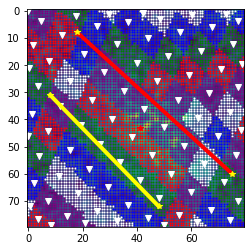

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_03_02
slice 2 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_03_02/corners_layer.dat
edge_pts [[73, 59], [42, 71]] axis_pts [[19, 8], [9, 33]]
laminar axis unit vectors: [0.7270131525498175, 0.6866235329637166] [0.655686655446243, 0.7550331183926435]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_03_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_03_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_03_02/corners_layer_laminar_distances.txt


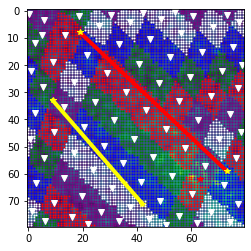

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_04_02
slice 2 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_04_02/corners_layer.dat
edge_pts [[75, 67], [52, 73]] axis_pts [[14, 7], [7, 33]]
laminar axis unit vectors: [0.7129262923855025, 0.7012389761168877] [0.7474093186836598, 0.6643638388299198]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_04_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_04_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_04_02/corners_layer_laminar_distances.txt


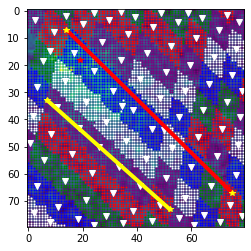

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_01
slice 2 , rec 1
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_01/corners_layer.dat
edge_pts [[75, 60], [49, 72]] axis_pts [[25, 8], [7, 29]]
laminar axis unit vectors: [0.6931087162517846, 0.720833064901856] [0.6987395238751688, 0.7153761792055299]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_01//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_01/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_01/corners_layer_laminar_distances.txt


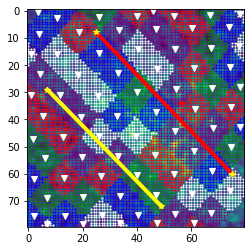

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_05
slice 2 , rec 5
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_05/corners_layer.dat
edge_pts [[75, 60], [49, 72]] axis_pts [[25, 8], [7, 29]]
laminar axis unit vectors: [0.6931087162517846, 0.720833064901856] [0.6987395238751688, 0.7153761792055299]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_05//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_05/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_05/corners_layer_laminar_distances.txt


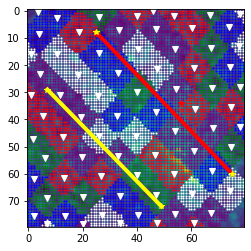

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_06
slice 2 , rec 6
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_06/corners_layer.dat
edge_pts [[75, 60], [49, 72]] axis_pts [[25, 8], [7, 29]]
laminar axis unit vectors: [0.6931087162517846, 0.720833064901856] [0.6987395238751688, 0.7153761792055299]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_06//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_06/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis02_06_06/corners_layer_laminar_distances.txt


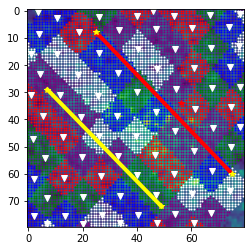

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_03
slice 3 , rec 3
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_03/corners_layer.dat
edge_pts [[76, 32], [73, 61]] axis_pts [[8, 31], [8, 60]]
laminar axis unit vectors: [0.9998918860475786, 0.014704292441876156] [0.999881677808259, 0.015382795043203983]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_03//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_03/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_03/corners_layer_laminar_distances.txt


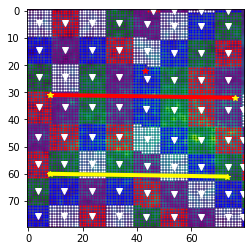

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_05
slice 3 , rec 5
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_05/corners_layer.dat
edge_pts [[76, 32], [73, 61]] axis_pts [[8, 31], [8, 60]]
laminar axis unit vectors: [0.9998918860475786, 0.014704292441876156] [0.999881677808259, 0.015382795043203983]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_05//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_05/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_05/corners_layer_laminar_distances.txt


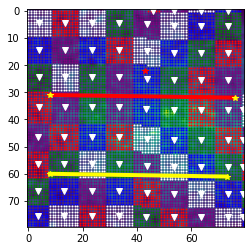

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_08
slice 3 , rec 8
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_08/corners_layer.dat
edge_pts [[76, 32], [73, 61]] axis_pts [[8, 31], [8, 60]]
laminar axis unit vectors: [0.9998918860475786, 0.014704292441876156] [0.999881677808259, 0.015382795043203983]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_08//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_08/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_01_08/corners_layer_laminar_distances.txt


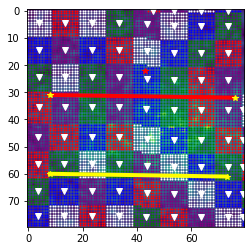

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_02
slice 3 , rec 2
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_02/corners_layer.dat
edge_pts [[75, 44], [75, 68]] axis_pts [[8, 36], [7, 63]]
laminar axis unit vectors: [0.9929467931694284, 0.11856081112470786] [0.9973076252903365, 0.07333144303605414]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_02//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_02/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_02/corners_layer_laminar_distances.txt


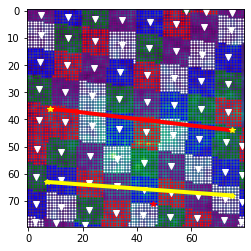

C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_06
slice 3 , rec 6
Processing C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_06/corners_layer.dat
edge_pts [[75, 44], [75, 68]] axis_pts [[8, 36], [7, 63]]
laminar axis unit vectors: [0.9929467931694284, 0.11856081112470786] [0.9973076252903365, 0.07333144303605414]
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_06//roi_centers.txt
Created file: C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_06/sq_rois.dat
File created:  C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/03-15-23\selected_zda\analysis03_04_06/corners_layer_laminar_distances.txt


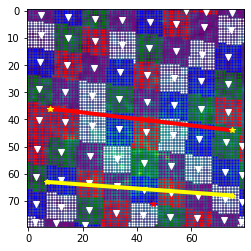

	slice directory count: 38
	missing_la_file_count: 0


In [4]:
slice_count = 0
meas_count = 0
missing_la_file_count = 0
for subdir, dirs, files in os.walk(data_dir):
    if 'notUsable' in subdir:
        continue
    if 'selected_zda' not in subdir:
        continue
    print(subdir)
    subdir += '/'
    if len(files) > 0:
        slice_count += 1
    for filename in files:
        fn = filename.split(".")[0]
        if (fn.endswith("_snr") or fn.startswith("SNR")) and "roi" not in fn:
            name_parse = filename[:8]  # of the format 07-01-01
            if fn.startswith("SNR"):
                name_parse = filename[4:11]
            try:
                sep = "_"
                if "-" in name_parse:
                    sep = "-"
                slic, loc, rec = [int(x) for x in name_parse.split(sep)]
            except ValueError:
                print("Could not parse:", name_parse)
                continue
            if slic not in image_data:
                image_data[slic] = {}
            if loc not in image_data[slic]:
                image_data[slic][loc] = {}
            if rec not in image_data[slic][loc]:
                image_data[slic][loc][rec] = {}
            if subdir not in image_data[slic][loc][rec]:
                image_data[slic][loc][rec][subdir] = {}
                
            snr = np.loadtxt(subdir + filename,
                             delimiter='\t',
                             usecols=(1,))
            width = int(np.sqrt(snr.shape[0]))
            snr = snr.reshape((width, width))
            n_grid_size = int(width / n_sq)  # how many squares will fit along frame edge

            print("slice", slic, ", rec", rec)

            # open corners, 2 points p1, p2 to define the edge along which to measure
            
            la_file = subdir + corners_file_prefix_layer + '.dat'
            lines = None
            if not os.path.exists(la_file):
                missing_la_file_count += 1
            else:
                print("Processing", la_file)
                meas_count += 1
                with open(la_file, 'r') as f:
                    lines = f.readlines() 
                corners = [int(x) for x in lines[4:]] # the last 4 lines are diode numbers of corners
                layer_axes = LayerAxes(corners)
                laminar_axis, laminar_axis_2 = layer_axes.get_layer_axes()
                print("laminar axis unit vectors:", laminar_axis.get_unit_vector(), 
                      laminar_axis_2.get_unit_vector())

                # make our own square ROIs aligned to the list of edges and write them to a .dat file
                roi_cr = SquareROICreator(layer_axes, roi_width=n_sq)
                rois = roi_cr.get_rois()  # list of LaminarROI objects
                roi_centers = roi_cr.get_roi_centers(rounded=True) 
                # print("ROI centers:", roi_centers)
                roi_cr.write_roi_centers_to_file(subdir + "/" + rois_centers_filenames)

                # write these ROIs to file
                ################################
                # TO DO: filter out ROIs by SNR to be able to do smaller ROIs without exceeding 100-ROI cap
                ################################
                
                roi_fn = roi_cr.write_roi_file(subdir, rois_file_prefix)
                print("Created file:", roi_fn)

                # open stim point roi as a single integer (its diode number) in variable stim_pt
                sp_file = subdir + electrode_file_prefix + '.dat'
                with open(sp_file, 'r') as f:
                    lines = f.readlines()
                stim_pt = int(lines[-1]) # last line is always electrode location
                aux_obj = LaminarROI([stim_pt]).get_points()
                stim_pt = aux_obj[0]  # should be a list of len 2, representing px location [x, y]
                #print("Stim point:", stim_pt)

                # run laminar dist computation
                laminar_distances_obj = LaminarDistance(laminar_axis, rois, stim_pt)
                laminar_distances = laminar_distances_obj.compute_laminar_distances()
                laminar_distances = [round(ld, 2) for ld in laminar_distances]
                #print('laminar_distances:', laminar_distances)  # a list of integers with same indexing as rois

                # run laminar dist again with the other axis
                laminar_distances_2 = LaminarDistance(laminar_axis_2, rois, stim_pt).compute_laminar_distances()
                laminar_distances_2 = [round(ld, 2) for ld in laminar_distances_2]
                #print('laminar_distances 2:', laminar_distances_2)  # a list of integers with same indexing as rois

                # write averaged laminar distances to file
                avg_laminar_distances = [round(
                    (laminar_distances[i] + laminar_distances_2[i]) / 2,
                    2)
                                        for i in range(len(laminar_distances))]
                #print('laminar_distances averaged :', avg_laminar_distances) 
                ld_filename_base = la_file[:-4] + "_"
                laminar_distances_obj.write_laminar_distance_file(ld_filename_base, avg_laminar_distances)
                
                #image_data[slic][loc][rec][subdir] = {
                #    'snr': snr,
                #    'filename': filename}

                # Now that the data is stored, show intermediate computations in plot
                if n_plots > 0:
                    lines = [laminar_axis.get_line_repr(),
                             laminar_axis_2.get_line_repr()]
                    line_colors = ['red', 'yellow']
                    linewidths = [4,4]
                    other_colors = ['red', 'green', 'blue', 'white', 'purple']
                    roi_colors = []

                    # laminar aux lines
                    uv = laminar_axis.get_unit_vector()
                    for i in range(len(laminar_distances)):
                        ld = laminar_distances[i]
                        jiggle = i - int(len(laminar_distances) / 2)
                        uv_perp = Line(laminar_axis.get_start_point(), 
                                       laminar_axis_2.get_start_point()).get_unit_vector()
                        stim_proxy_pt = [stim_pt[0] - jiggle * uv_perp[0], 
                                         stim_pt[1] - jiggle * uv_perp[1]]
                        measure_vector = [uv[0] * ld + stim_proxy_pt[0], uv[1] * ld + stim_proxy_pt[1]]
                        lines.append([measure_vector, stim_proxy_pt])
                        this_color = other_colors[i % len(other_colors)]
                        line_colors.append(this_color)
                        roi_colors.append(this_color)
                        linewidths.append(1)

                    GridVisualization(snr, stim_pt, roi_centers, layer_axes.get_corners(),
                                      lines, line_colors, linewidths,
                                      rois, roi_colors,
                                      save_dir=subdir+"LaminarVisual"+name_parse+'.png')
                    n_plots -= 1

print("\tslice directory count:", slice_count)
print("\tmissing_la_file_count:", missing_la_file_count)

In [5]:
## 3) take SNRs and latencies to .dat file of each ROI from PhotoZ
slice_count = 0
missing_roi_file_count = 0
if not disable_photoZ_interact:
    for subdir, dirs, files in os.walk(data_dir):
        if 'notUsable' in subdir:
            continue
        if 'selected_zda' not in subdir:
            continue
        
        
                
        for zda_file in files:
            if zda_file.endswith('.zda'):
                rec_id = zda_file.split('.')[0]
                slic_id, loc_id, _ = [int(x) for x in rec_id.split("_")]
                print(rec_id)
                
                # check for existing files
                filename_end = "_rois_" + rec_id + ".dat"
                snr_filename = subdir + "/" + "snr_" + filename_end
                latency_filename = subdir + "/" + "latency_" + filename_end                
                need_to_open_zda = (not os.path.isfile(snr_filename)) or (not os.path.isfile(latency_filename))
                slice_count += 1
                
                if need_to_open_zda:
                    
                    roi_fn = rois_file_prefix + ".dat"
                    if roi_fn not in files:
                        print("\t", subdir, "has no file named", rois_file_prefix + ".dat") 
                        missing_roi_file_count += 1
                        continue
                    roi_fn = subdir + "/" + roi_fn
                    
                    # open this zda file in photoZ
                    aPhz = AutoPhotoZ(data_dir=subdir)
                    aPhz.select_PhotoZ()

                    print("\n\nOpening", zda_file)
                    aPhz.open_zda_file(subdir + "/" + zda_file)

                    # open ROI file
                    aPhz.select_roi_tab()
                    aPhz.open_roi_file(roi_fn)

                    # save SNR values
                    aPhz.select_SNR_trace_value()
                    aPhz.save_trace_values(snr_filename)

                    # save latency values
                    aPhz.select_latency_trace_value()
                    aPhz.save_trace_values(latency_filename)

                else:
                    print("snr_" + filename_end, "and", "latency_" + filename_end, "already exist in", subdir)

print("\tslice directory count:", slice_count)
print("\tmissing_roi_file_count:", missing_roi_file_count)

02_01_01
snr__rois_02_01_01.dat and latency__rois_02_01_01.dat already exist in C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_01
02_01_03
snr__rois_02_01_03.dat and latency__rois_02_01_03.dat already exist in C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_01_03
02_02_02
snr__rois_02_02_02.dat and latency__rois_02_02_02.dat already exist in C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis02_02_02
03_01_01
snr__rois_03_01_01.dat and latency__rois_03_01_01.dat already exist in C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_01_01
03_02_01
snr__rois_03_02_01.dat and latency__rois_03_02_01.dat already exist in C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/mm_hidden/02-28-23\selected_zda\analysis03_02_01
03_02_02
snr__rois_03_02_02.dat and latency__rois_03_02_02.dat already exist in 

In [6]:
## filter out no-response grid squares by SNR cutoff (or manual inspection?)
###   Read in the SNR/latency files/roi center files
slice_count = 0
for slic in image_data:
    for loc in image_data[slic]:
        for rec in image_data[slic][loc]:
            for subdir in image_data[slic][loc][rec]:
                print(image_data[slic][loc][rec][subdir])
                
                def pad_z2(x):
                    x = str(x)
                    while len(x) < 2:
                        x = '0' + x
                    return x
                
                rec_id = pad_z2(slic) + "_" + pad_z2(loc) + "_" + pad_z2(rec)
                
                filename_end = "_rois_" + rec_id + ".dat"
                snr_filename = subdir + "/" + "SNR_" + filename_end
                latency_filename = subdir + "/" + "latency_" + filename_end 
                roi_center_filename = subdir + "/" + rois_centers_filenames


                snr_df = pd.read_csv(snr_filename, sep='\t', header=None,
                                     names=['Index',  'Values'])
                latency_df = pd.read_csv(snr_filename, sep='\t', header=None,
                                     names=['Index',  'Values'])
                roi_center_df = pd.read_csv(roi_center_filename, sep='\t', header=None,
                                     names=['x',  'y'])
                

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
